In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image


In [90]:

def generator(dir, gen= image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


batch_size  = 32
picture_size = 24
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory("dataset_new/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(f"dataset_new/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
SPE= len(train_set.classes)//batch_size #Steps_per_Epochs
VS = len(test_set.classes)//batch_size #Validation_size
print(SPE,VS)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6


In [91]:
train_set.class_indices

{'Closed': 0, 'Open': 1}

In [92]:


from tensorflow.keras.optimizers import Adam,SGD,RMSprop


In [97]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 18, 18, 64)      

In [94]:
history = model.fit_generator (generator=train_set,
                                steps_per_epoch=SPE,
                                epochs=20,
                                validation_data = test_set,
                                validation_steps = VS,
                                )

C:\Users\naeem\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
38/38 [==============================] - 6s 143ms/step - loss: 4.4222 - accuracy: 0.8003 - val_loss: 0.1762 - val_accuracy: 0.9323
Epoch 2/20
38/38 [==============================] - 5s 132ms/step - loss: 0.1590 - accuracy: 0.9443 - val_loss: 0.1424 - val_accuracy: 0.9375
Epoch 3/20
38/38 [==============================] - 5s 133ms/step - loss: 0.0897 - accuracy: 0.9725 - val_loss: 0.1149 - val_accuracy: 0.9427
Epoch 4/20
38/38 [==============================] - 5s 130ms/step - loss: 0.0557 - accuracy: 0.9784 - val_loss: 0.1150 - val_accuracy: 0.9635
Epoch 5/20
38/38 [==============================] - 5s 133ms/step - loss: 0.0639 - accuracy: 0.9784 - val_loss: 0.1168 - val_accuracy: 0.9688
Epoch 6/20
38/38 [==============================] - 5s 134ms/step - loss: 0.0459 - accuracy: 0.9842 - val_loss: 0.1448 - val_accuracy: 0.9635
Epoch 7/20
38/38 [==============================] - 5s 134ms/step - loss: 0.0565 - accuracy: 0.9867 - val_loss: 0.1582 - val_accuracy: 0.9427
Epoch 

In [95]:
model.save('models/best.h5')

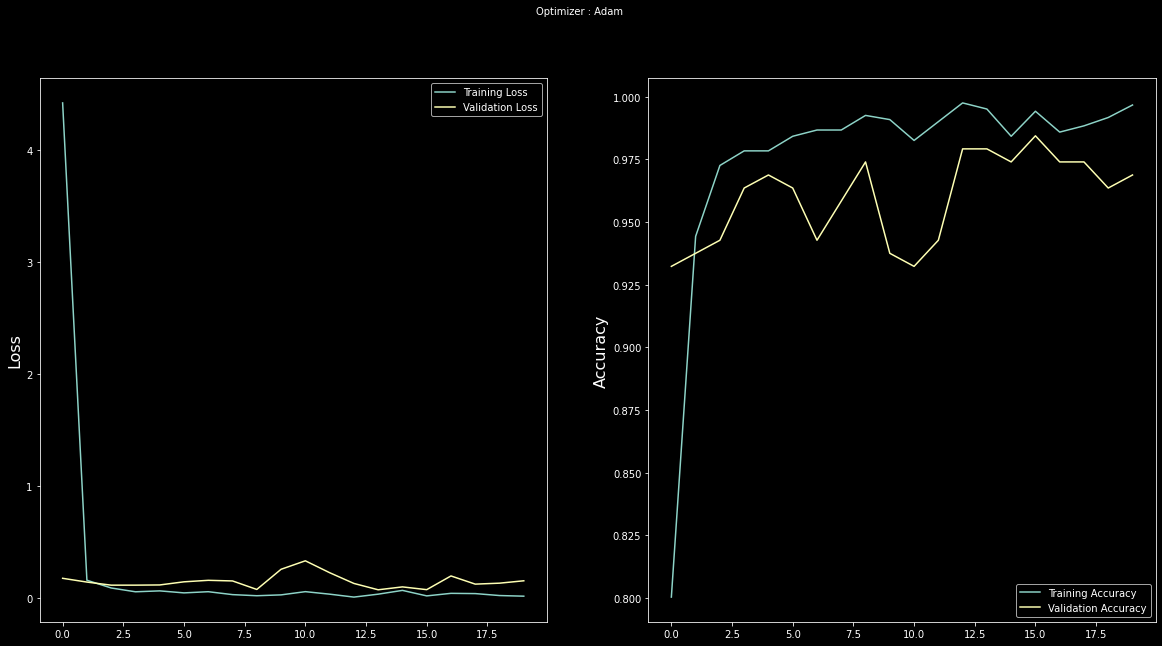

In [96]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
